In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


{'Social_Network_Ads.csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n15624510,Male,19,19000,0\r\n15810944,Male,35,20000,0\r\n15668575,Female,26,43000,0\r\n15603246,Female,27,57000,0\r\n15804002,Male,19,76000,0\r\n15728773,Male,27,58000,0\r\n15598044,Female,27,84000,0\r\n15694829,Female,32,150000,1\r\n15600575,Male,25,33000,0\r\n15727311,Female,35,65000,0\r\n15570769,Female,26,80000,0\r\n15606274,Female,26,52000,0\r\n15746139,Male,20,86000,0\r\n15704987,Male,32,18000,0\r\n15628972,Male,18,82000,0\r\n15697686,Male,29,80000,0\r\n15733883,Male,47,25000,1\r\n15617482,Male,45,26000,1\r\n15704583,Male,46,28000,1\r\n15621083,Female,48,29000,1\r\n15649487,Male,45,22000,1\r\n15736760,Female,47,49000,1\r\n15714658,Male,48,41000,1\r\n15599081,Female,45,22000,1\r\n15705113,Male,46,23000,1\r\n15631159,Male,47,20000,1\r\n15792818,Male,49,28000,1\r\n15633531,Female,47,30000,1\r\n15744529,Male,29,43000,0\r\n15669656,Male,31,18000,0\r\n15581198,Male,31,74000,0\r\n15729054,Female,27,137000,1\r\n1

In [0]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
X=dataset.iloc[:,[2,3]].values

In [0]:
y=dataset.iloc[:,4].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_x=StandardScaler()

In [14]:
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
from sklearn.svm import SVC

In [0]:
clf=SVC(kernel='linear',random_state=0)

In [32]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred=clf.predict(X_test)

In [34]:
clf.score(X_test,y_test)

0.88

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm=confusion_matrix(y_test,y_pred)

In [37]:
cm

array([[63,  5],
       [ 7, 25]])

In [0]:
#AS here i choose kernal is linear hence its graph similiar to like logisitic regression

In [0]:
from matplotlib.colors import ListedColormap

In [0]:
#visualization for training set:----
X_set,y_set=X_train,y_train

In [0]:
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

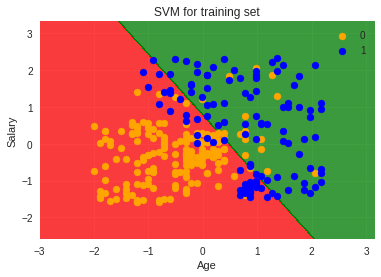

In [42]:
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('SVM for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [0]:
X_set,y_set=X_test,y_test

In [0]:
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

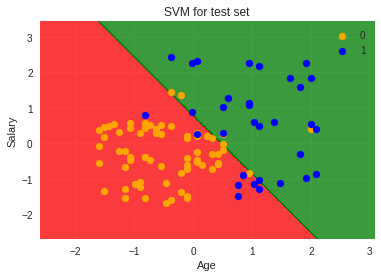

In [45]:
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('SVM for test set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()